In [1]:
import matplotlib.pyplot as plt
import numpy as np
import trimesh

In [2]:
mesh = trimesh.primitives.Sphere()
print(mesh.is_watertight)
scene = mesh.scene()

angle = np.pi / 4  # 旋转 45 度

# 创建一个旋转矩阵，围绕 z 轴旋转
rotation_matrix = trimesh.transformations.rotation_matrix(angle, [0, 1, 0])

# 将旋转矩阵应用到 Trimesh 对象上
mesh.apply_transform(rotation_matrix)

True


<trimesh.primitives.Sphere>

In [3]:
def compute_camera_matrices(fov, camera_position):
    # 首先，定义图像平面的大小
    img_width = 640
    img_height = 480

    # 计算焦距
    f = img_width / (2 * np.tan(fov / 2))

    # 内参矩阵
    K = np.array([[f, 0, img_width / 2],
                  [0, f, img_height / 2],
                  [0, 0, 1]])

    # 外参矩阵
    # 我们假设相机看向 -Z 方向，并且相机的 "上" 方向是 +Y 方向。
    R = np.array([[1, 0, 0],
                  [0, 1, 0],
                  [0, 0, -1]])

    T = -R @ camera_position

    RT = np.hstack([R, T.reshape(3, 1)])

    return K, RT

In [4]:
from trimesh_projection_copy import perspective_projected
K,RT = compute_camera_matrices(45,[0,0,1])
path2d = perspective_projected(mesh,[0,0,-1],K,RT)


(642, 2)


C:\LURA\3D_Rim_py\lib\trimesh_projection_copy.py:236: RuntimeWarning: invalid value encountered in divide
  points_2d = points_2d / points_2d[:, 2, np.newaxis]


AttributeError: 'Polygon' object has no attribute 'geoms'

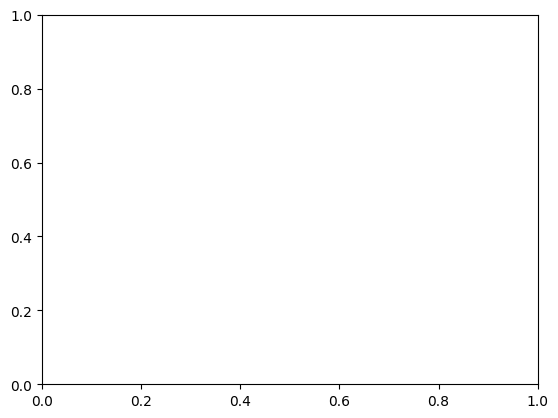

In [5]:
fig, ax = plt.subplots()

# 绘制MultiPolygon
for polygon in path2d.geoms:
    x,y = polygon.exterior.xy
    ax.plot(x, y)

# 显示图形
plt.show()z

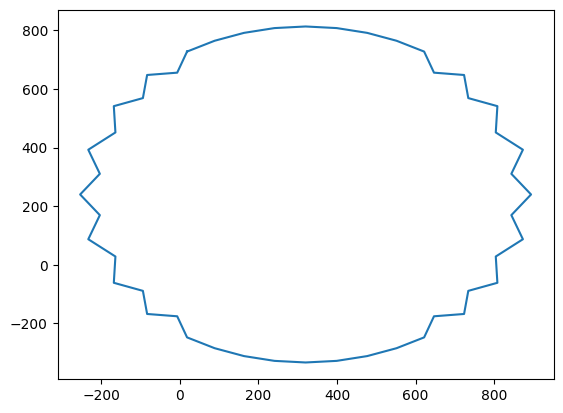

In [7]:
fig, ax = plt.subplots()

# 绘制MultiPolygon
x,y = path2d.exterior.xy
ax.plot(x, y)

# 显示图形
plt.show()

In [ ]:
print(type(path2d))